In [1]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram

In [2]:
qb_Alice = QuantumRegister(1, name='qr')
qb_Bob = QuantumRegister(1, name='qr1')
Superdense_Code = QuantumCircuit(qb_Alice, qb_Bob)

In [3]:
def buid_Bell_pair(qc,q1,q2): #To build up the a bell pair state
    qc.h(q1)          #Applying the Hadamard gate on qubit for alice
    qc.cx(q1,q2)      #Applying the Cnot gate with the control qubit Alice's and target qubit bob's

In [4]:
def operation_from_Alice(qc,q1,classical_info):
    if classical_info =='00': #The classical information Alice want to send
        return
    elif classical_info =='01':#The classical information Alice want to send
        qc.z(q1)
    elif classical_info =='10':#The classical information Alice want to send
        qc.x(q1)
    else:  #'11': #The classical information Alice want to send
        qc.x(q1)
        qc.z(q1)
    

In [5]:
def Bell_decoding(qc,q1,q2): # The step Bob get the qubit operated by Alice and another qubit of Bell pair state.
    qc.cx(q1,q2)            #Bob applies the CNOT gate with the control qubit Alice's and target qubit bob's
    qc.h(q1)                # #Applying the Hadamard gate on qubit for alice's qubit

In [6]:
classical_info='01'

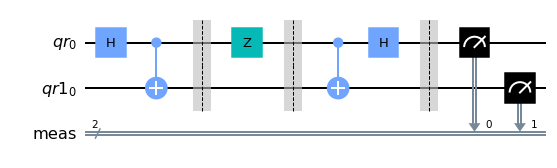

In [7]:
buid_Bell_pair(Superdense_Code, 0, 1)
Superdense_Code.barrier()
operation_from_Alice(Superdense_Code,0,classical_info)
Superdense_Code.barrier()
Bell_decoding(Superdense_Code,0,1)
Superdense_Code.measure_all()
Superdense_Code.draw(output = "mpl")

{'01': 10}


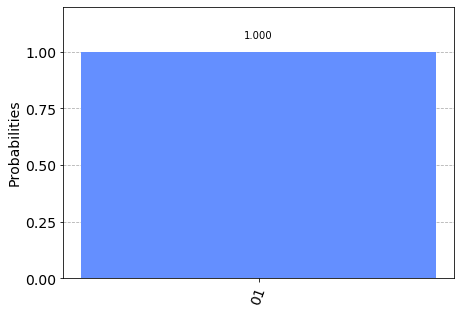

In [8]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(Superdense_Code, backend, shots=10)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(Superdense_Code)
print(measurement_result)
plot_histogram(measurement_result)